##### Name - Shunottara Alhat


# Assignment 7 Clustering - Q2. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples , silhouette_score , calinski_harabasz_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from sklearn.datasets import make_blobs
from itertools import product

import matplotlib.pyplot as plt
import matplotlib.cm as CM
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')


In [2]:
CrimeData = pd.read_csv("crime_data.csv")
CrimeData.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
CrimeData.rename(columns={'Unnamed: 0':'Places'},inplace =True)
CrimeData

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#### Descriptive 

In [4]:
CrimeData.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#### Info 

In [5]:
CrimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Places    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Missing Value 

In [6]:
CrimeData.isnull()

,Places,Murder,Assault,UrbanPop,Rape
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [7]:
CrimeData.isnull().sum()

Places      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### Duplicates Value 

In [8]:
CrimeData.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

# Explorary Data Analysis

In [9]:
CrimeData.drop(['Places'],axis=1,inplace=True)
CrimeData

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


<AxesSubplot:>

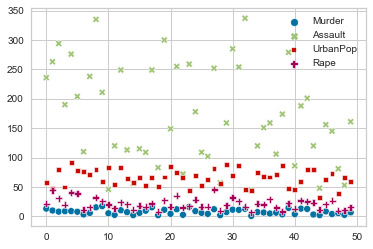

In [10]:
plt.figure(figsize = (6,4))
sns.scatterplot(data = CrimeData , alpha = 1)

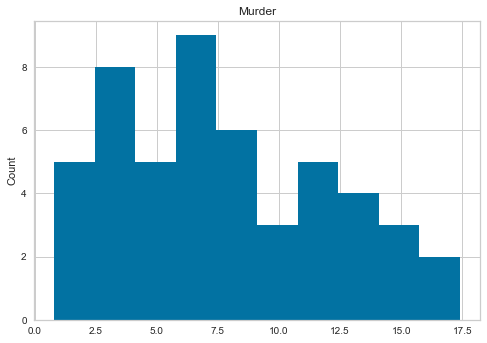

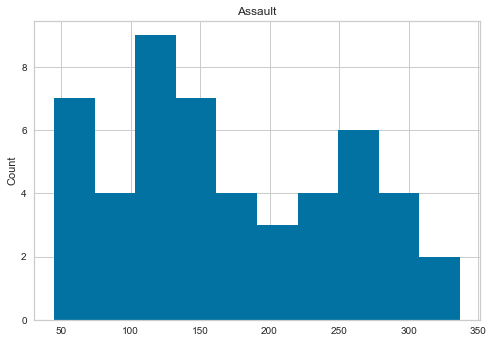

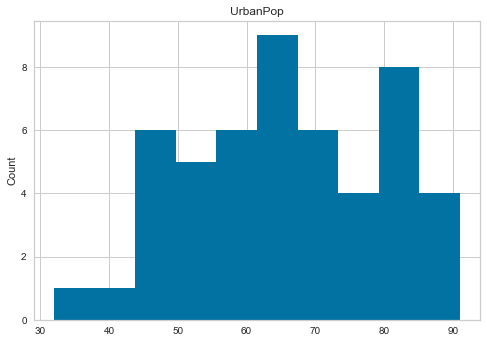

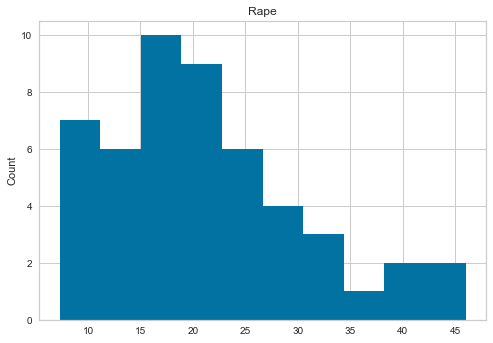

In [11]:
for feature in CrimeData.columns:
    CrimeData = CrimeData.copy()
    CrimeData[feature].hist(bins = 10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


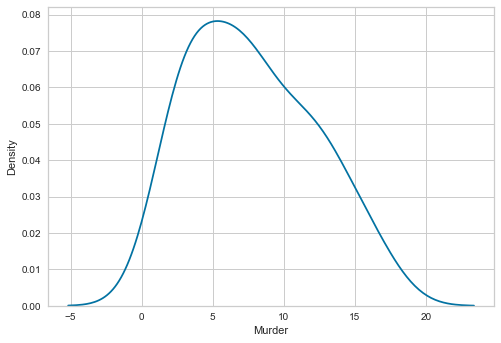

Assault


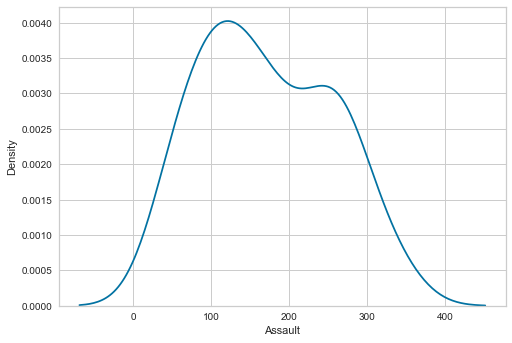

UrbanPop


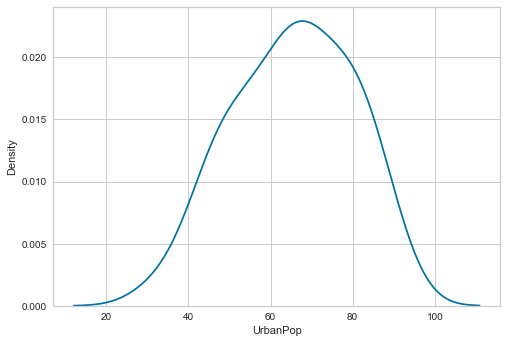

Rape


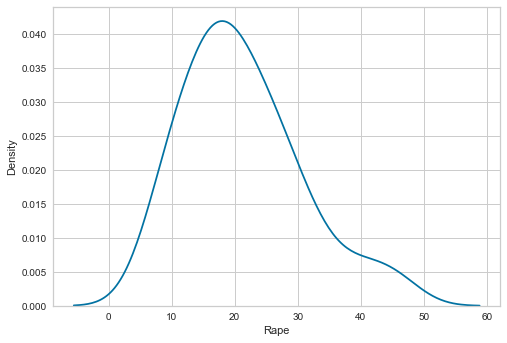

In [12]:
# Kernel Density for every feature, singled out

for n in CrimeData.columns:
    print(n)
    sns.kdeplot(CrimeData[n])
    plt.show()

### Outliers Detection 

In [13]:
CrimeData.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

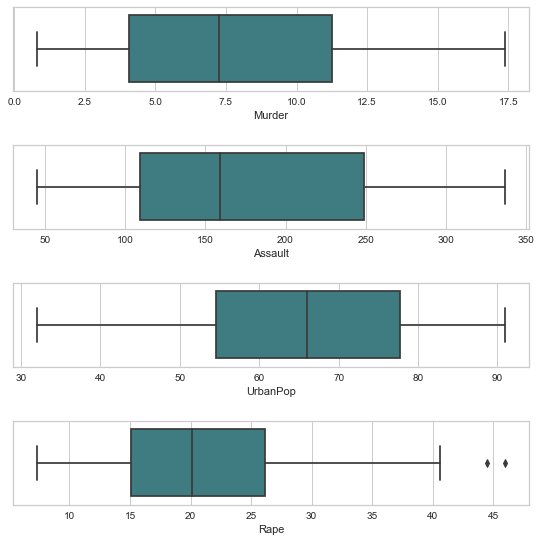

In [14]:
Outlier = CrimeData.copy()
fig , axes = plt.subplots(4,1, figsize = (8,8), sharex=False , sharey=False)
sns.boxplot(x = 'Murder', data = Outlier , palette = 'crest', ax = axes[0])
sns.boxplot(x = 'Assault', data = Outlier , palette = 'crest', ax = axes[1])
sns.boxplot(x = 'UrbanPop', data = Outlier , palette = 'crest', ax = axes[2])
sns.boxplot(x = 'Rape', data = Outlier , palette = 'crest', ax = axes[3])
plt.tight_layout(pad = 2.0)

<AxesSubplot:>

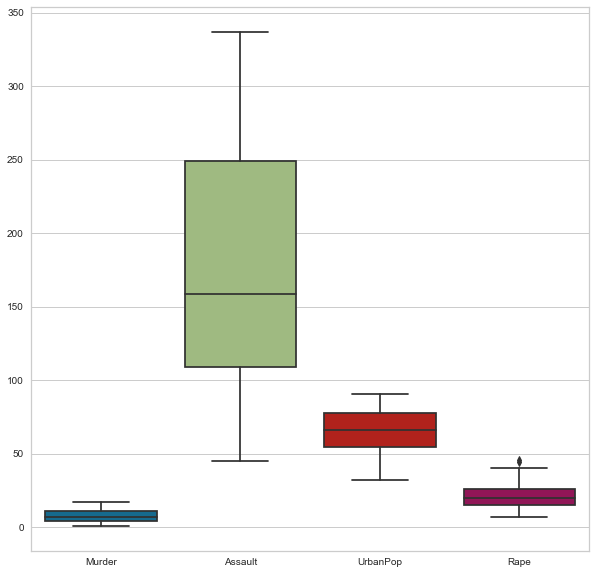

In [15]:
# Boxplot for all feature in the same group

plt.figure(figsize = (10,10))
sns.boxplot(data = CrimeData)

### Use SQRT() to see more clearly despite the outliers 

<AxesSubplot:>

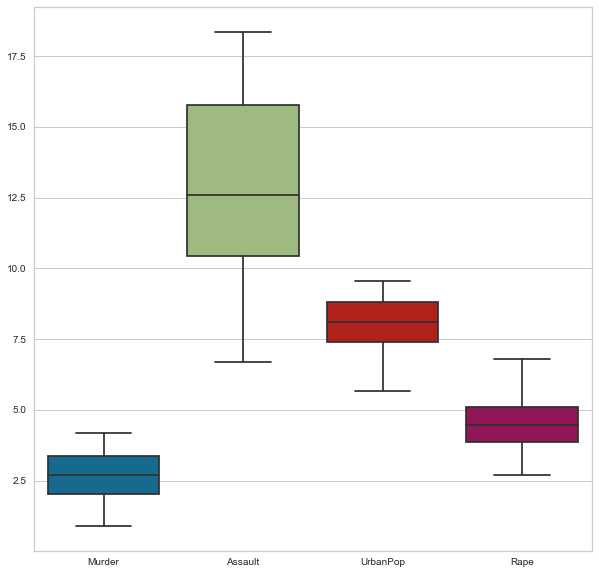

In [16]:
plt.figure(figsize = (10,10))
sns.boxplot(data = np.sqrt(CrimeData))

## Visualization 
### Correlation

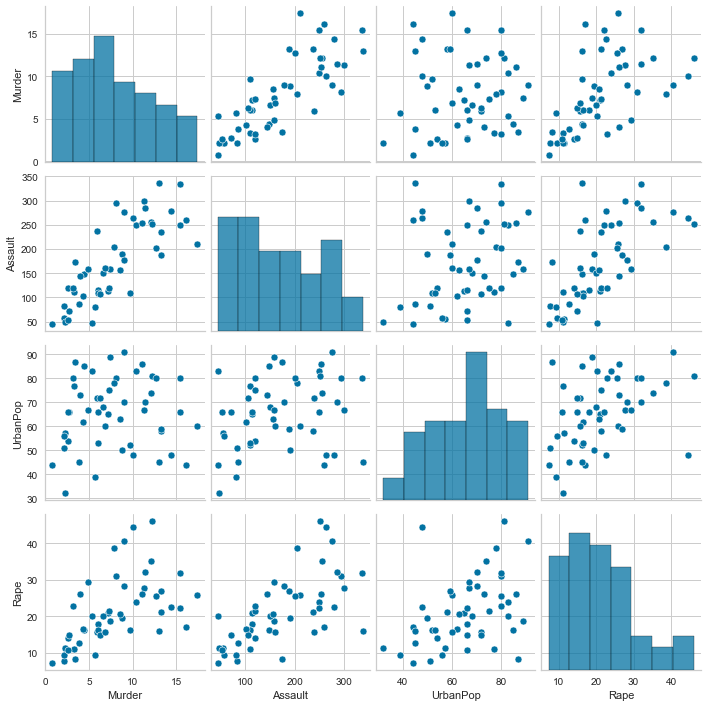

In [17]:
sns.pairplot(CrimeData)

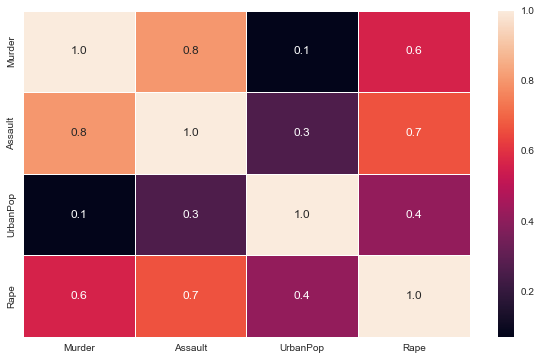

In [18]:
corr_matrix = CrimeData.corr()

f , ax = plt.subplots(figsize=(10,6))
sns.heatmap(CrimeData.corr(), annot=True, linewidths = 0.5, fmt ='0.1f',ax = ax)
plt.show()

#### Rate

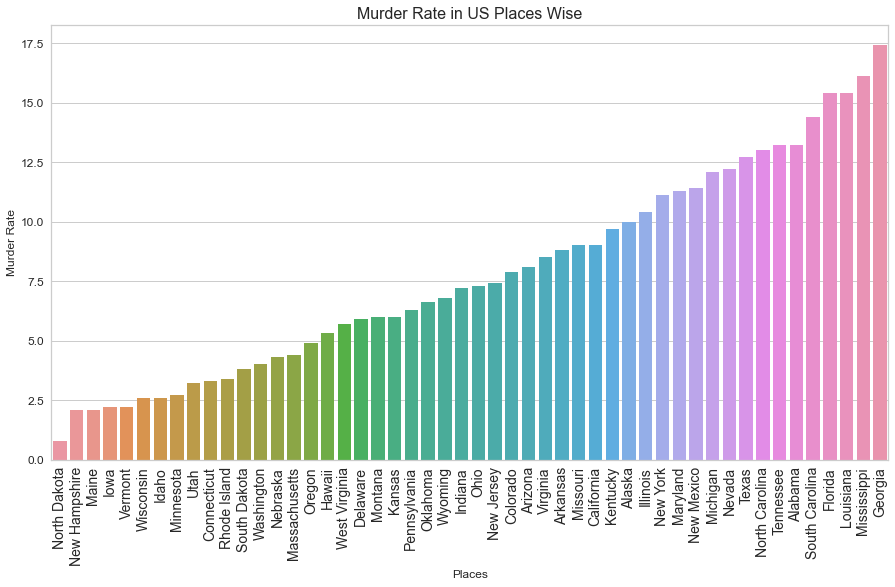

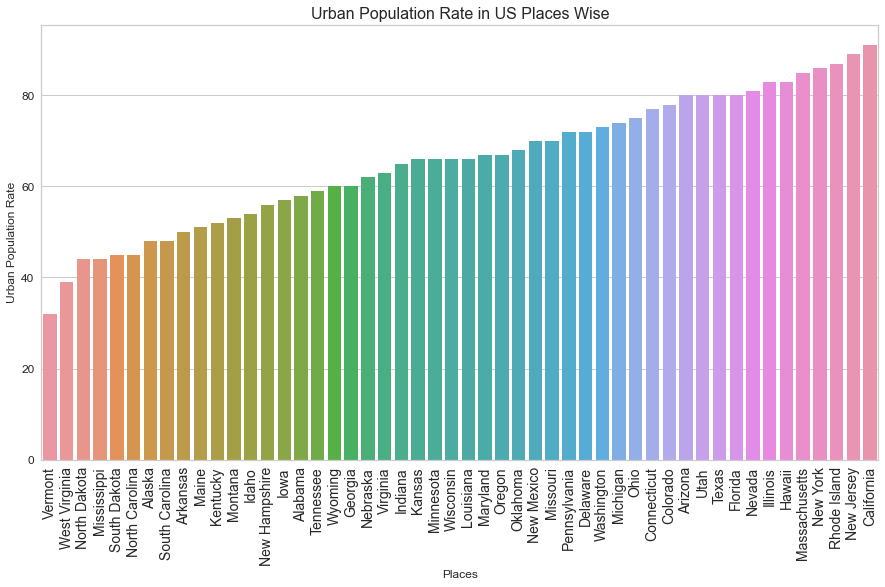

In [19]:
CrimeData = pd.read_csv("crime_data.csv")
CrimeData.rename(columns={'Unnamed: 0':'Places'},inplace =True)

plt.figure(figsize = (15,8))

# Make Barplot and Sort Bars
sns.barplot(x = "Places", y = "Murder" , data = CrimeData , order = CrimeData.sort_values("Murder").Places)

# Set Labels
plt.xlabel("Places", size = 12)
plt.ylabel("Murder Rate", size = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Murder Rate in US Places Wise", size = 16)
plt.show()

plt.figure(figsize = (15,8))
# Make Barplot and Sort Bars
sns.barplot(x = "Places", y = "UrbanPop" , data = CrimeData, order = CrimeData.sort_values('UrbanPop').Places)

# Set Labels
plt.xlabel("Places", size = 12)
plt.ylabel("Urban Population Rate", size = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US Places Wise", size = 16)
plt.show()

In [20]:
print("Top 10 Places with Highest Murder Rate")
murder = CrimeData.sort_values('Murder',ascending = False).head(10)
murder

Top 10 Places with Highest Murder Rate


,Places,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


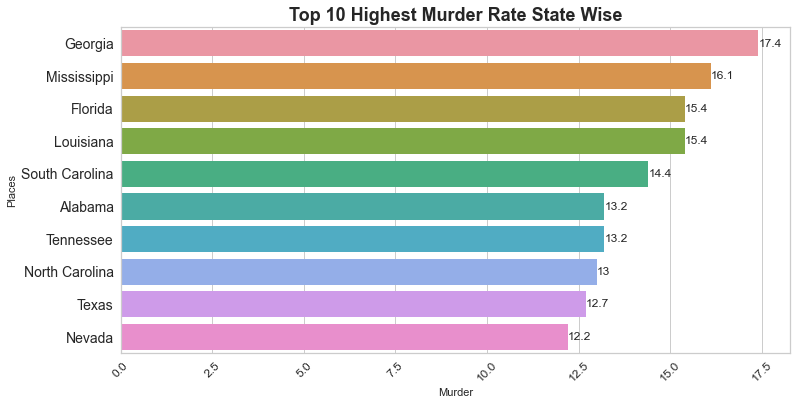

In [21]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = murder.Murder[:10], y = murder.Places[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [22]:
print("Top 10 Places with Lowest Murder Rate")
murder1 = CrimeData.sort_values('Murder',ascending = True).head(10)
murder1

Top 10 Places with Lowest Murder Rate


,Places,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


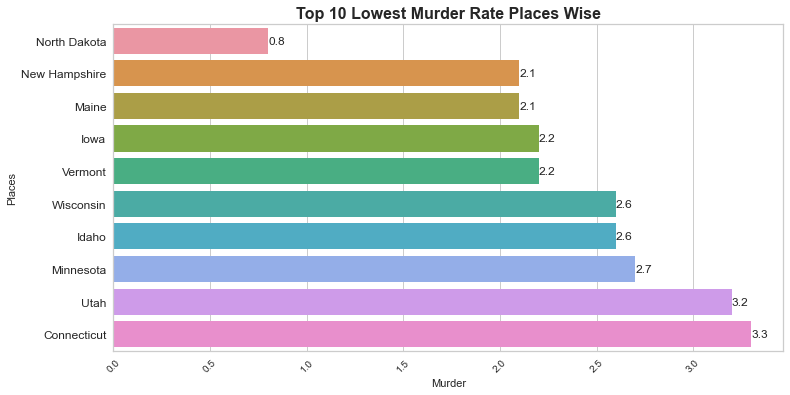

In [23]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = murder1.Murder[:10], y = murder1.Places[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Top 10 Lowest Murder Rate Places Wise', fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

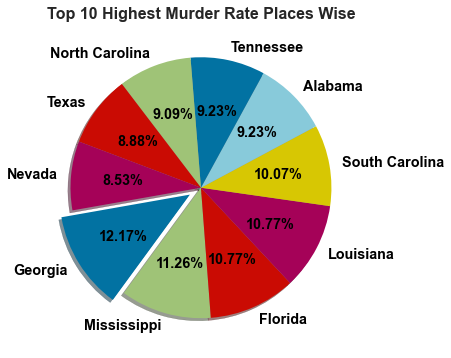

In [24]:
plt.figure(figsize = (6,6))
plt.pie(murder.Murder[:10], labels = murder.Places[:10], explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct = '%0.2f%%' , shadow = True, startangle = 190, 
        textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.title("Top 10 Highest Murder Rate Places Wise", fontsize = 16, fontweight = 'bold')
plt.show()

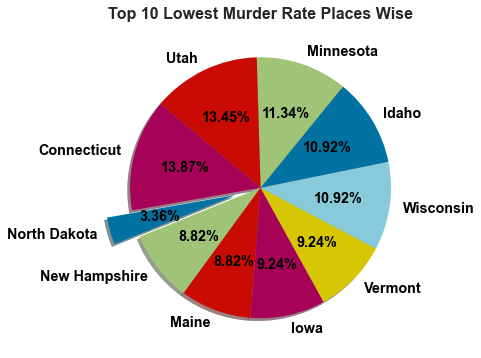

In [25]:
plt.figure(figsize = (6,6))
plt.pie(murder1.Murder[:10], labels = murder1.Places[:10], explode = [0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct = '%0.2f%%', shadow = True, startangle = 190, 
        textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.title("Top 10 Lowest Murder Rate Places Wise", fontsize = 16, fontweight = 'bold')
plt.show()

### Assault Rate 

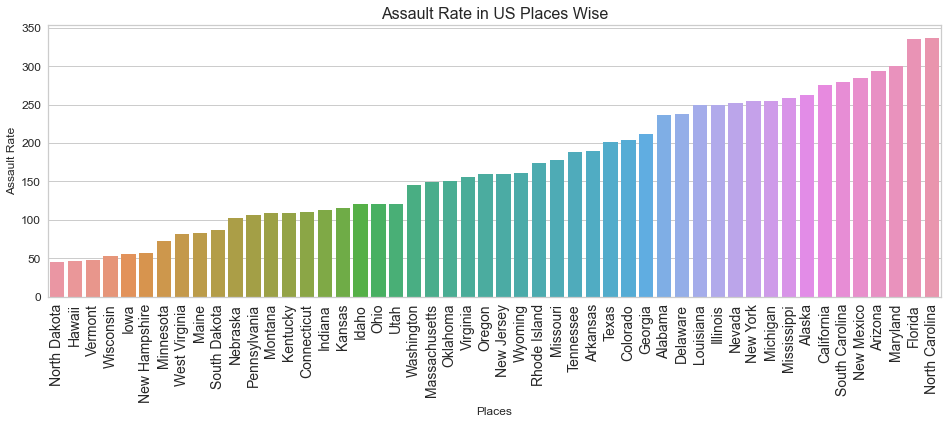

In [26]:
plt.figure(figsize = (16,5))

# Make Barplot and Sort Bars
sns.barplot(x = 'Places', y = 'Assault', data = CrimeData, order = CrimeData.sort_values('Assault').Places)

# Set Labels
plt.xlabel("Places", size = 12)
plt.ylabel("Assault Rate", size = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US Places Wise", size = 16)
plt.show()

In [27]:
print('Top 10 States with Highest Assault Rate')
CrimeData.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,Places,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


In [28]:
print('Top 10 States with Lowest Assault Rate')
CrimeData.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


,Places,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


In [29]:
Assault = CrimeData.sort_values('Assault', ascending = False)

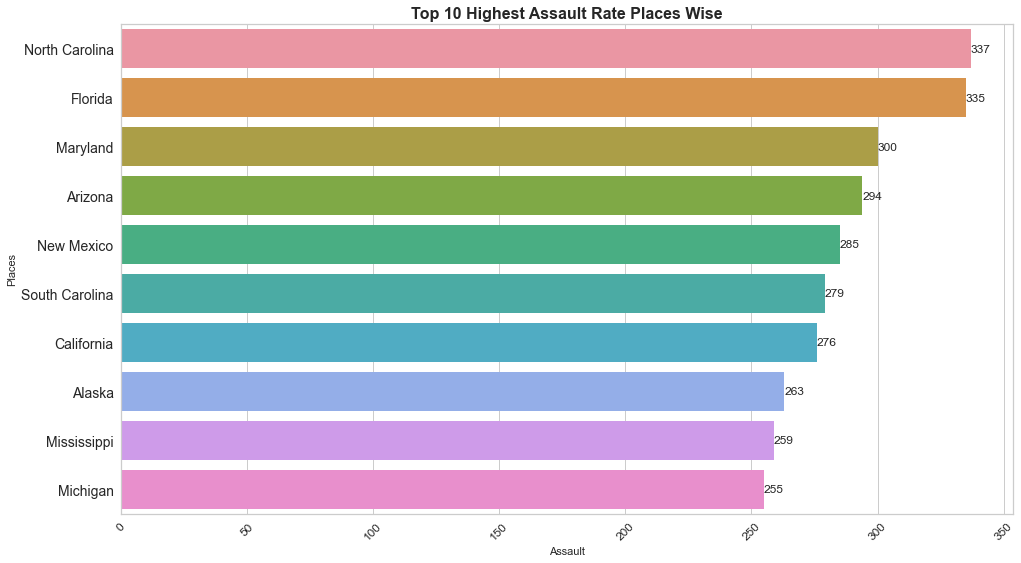

In [30]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.Places[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate Places Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

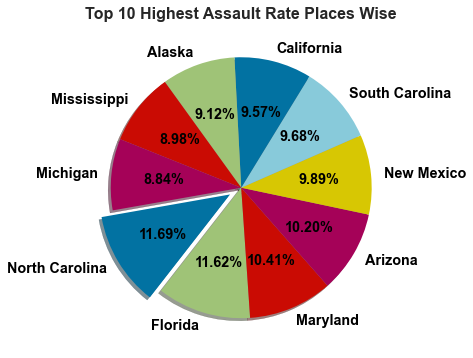

In [31]:
plt.figure(figsize = (6,6))
plt.pie(Assault.Assault[:10],labels=Assault.Places[:10],explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%',shadow= True,startangle= 190, 
        textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate Places Wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [32]:
Assault1 = CrimeData.sort_values('Assault', ascending = True)

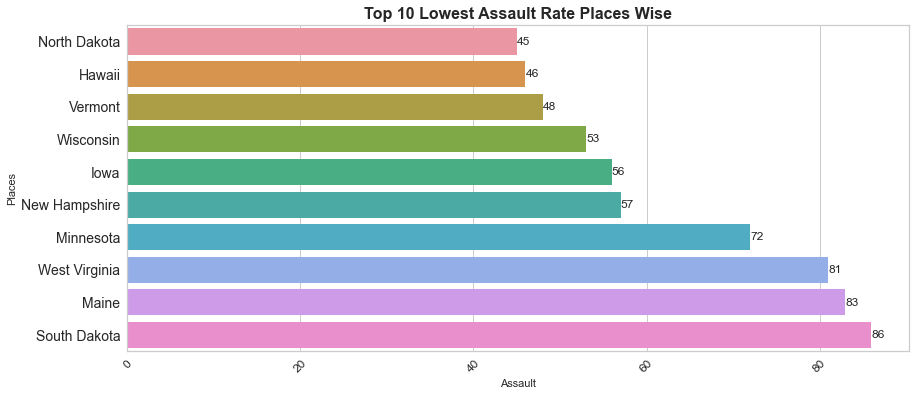

In [33]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = Assault1.Assault[:10], y = Assault1.Places[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Assault Rate Places Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

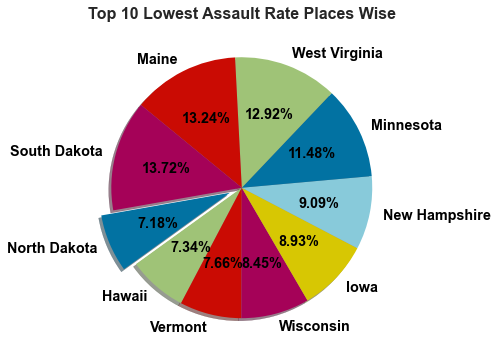

In [34]:
plt.figure(figsize = (6,6))
plt.pie(Assault1.Assault[:10],labels = Assault1.Places[:10], explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate Places Wise", fontsize = 16, fontweight = 'bold')
plt.show()

### Rape Rate 

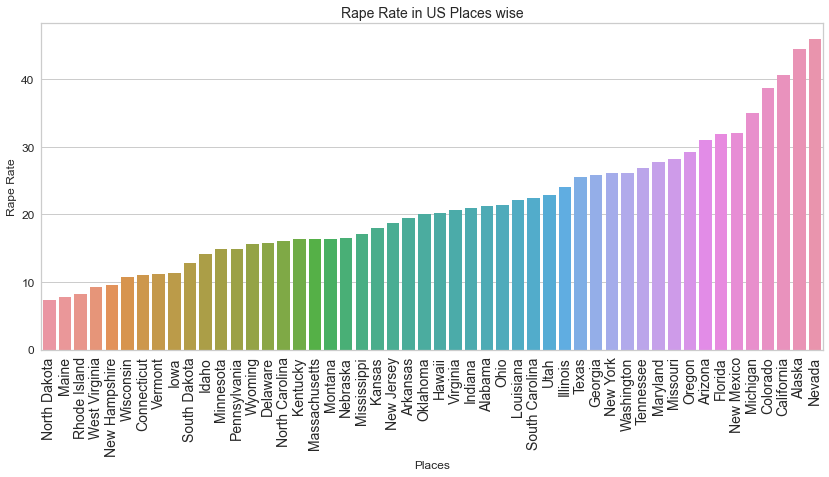

In [35]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='Places',y="Rape", data = CrimeData, 
            order = CrimeData.sort_values('Rape').Places)
# set labels
plt.xlabel("Places", size=12)
plt.ylabel("Rape Rate", size=12)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US Places wise", size=14)
plt.show()

In [36]:
print('Top 10 Places with Highest Rape Rate')
CrimeData.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 Places with Highest Rape Rate


,Places,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [37]:
print('Top 10 Places with Lowest Rape Rate')
CrimeData.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 Places with Lowest Rape Rate


,Places,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


In [38]:
Rape = CrimeData.sort_values('Rape', ascending = False)

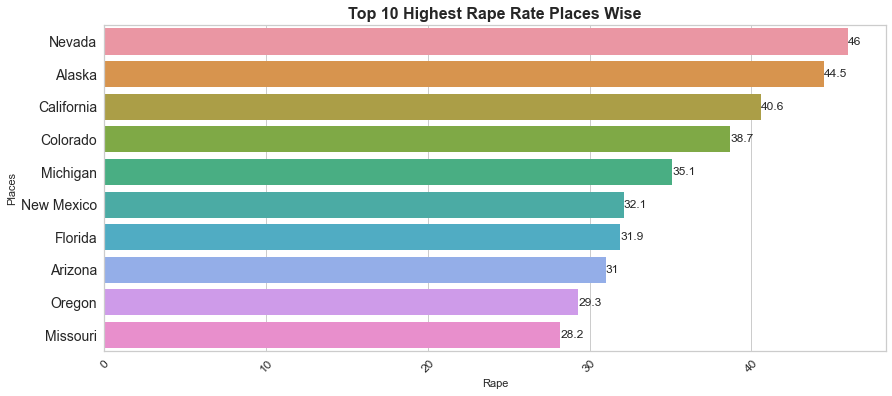

In [39]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.Places[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate Places Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

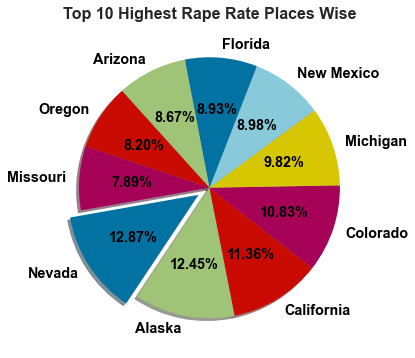

In [40]:
plt.figure(figsize = (6,6))
plt.pie(Rape.Rape[:10], labels=Rape.Places[:10], explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large','fontweight':'bold', 'rotation':'0','color':'black'})

plt.title("Top 10 Highest Rape Rate Places Wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [41]:
Rape = CrimeData.sort_values('Rape', ascending = True)

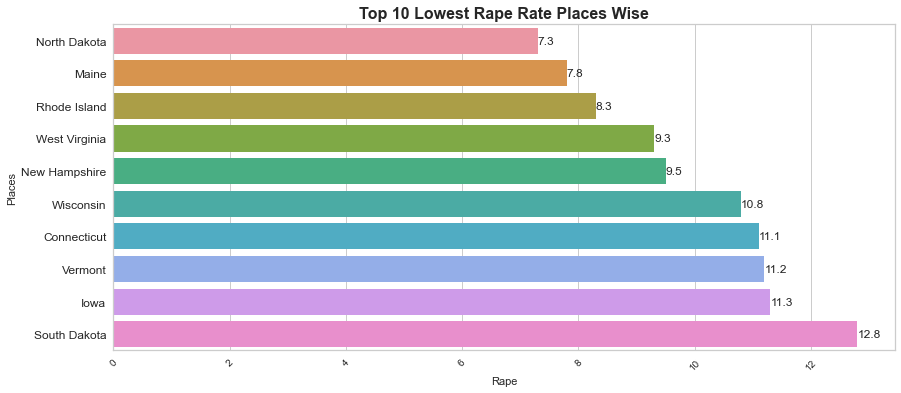

In [42]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.Places[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Top 10 Lowest Rape Rate Places Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

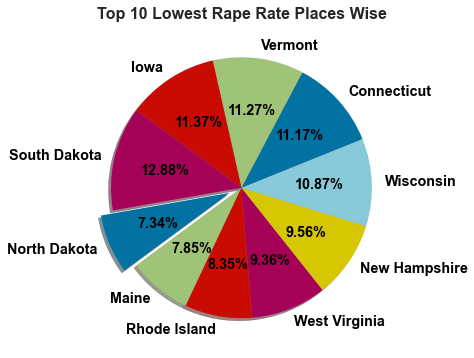

In [43]:
plt.figure(figsize = (6,6))
plt.pie(Rape.Rape[:10], labels = Rape.Places[:10],explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})

plt.title("Top 10 Lowest Rape Rate Places Wise", fontsize = 16, fontweight = 'bold')
plt.show()

### Urban Population Rate 

In [44]:
CrimeData.columns

Index(['Places', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

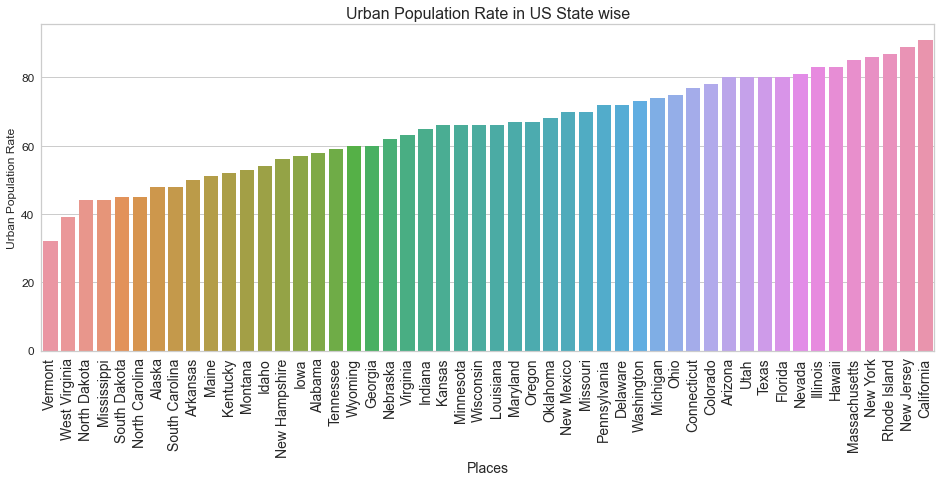

In [45]:
plt.figure(figsize=(16,6))

# Make barplot and sort bars
sns.barplot(x='Places', y="UrbanPop", data = CrimeData, order = CrimeData.sort_values('UrbanPop').Places)

# Set labels
plt.xlabel("Places", size = 14)
plt.ylabel("Urban Population Rate", size=12)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=16)
plt.show()


In [46]:
print('Top 10 States with Highest Urban Population Rate')
CrimeData.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,Places,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [47]:
print('Top 10 States with Lowest Urban Population Rate')
CrimeData.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,Places,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


In [48]:
Urbanpop = CrimeData.sort_values('UrbanPop', ascending = False)

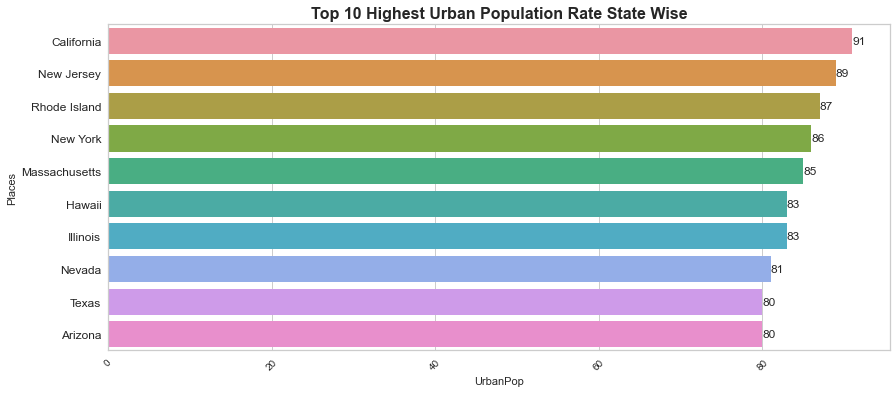

In [49]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = Urbanpop.UrbanPop[:10], y = Urbanpop.Places[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

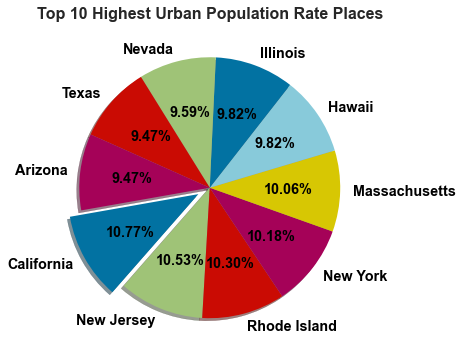

In [50]:
plt.figure(figsize = (6,6))
plt.pie(Urbanpop.UrbanPop[:10], labels = Urbanpop.Places[:10], explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large','fontweight':'bold', 'rotation':'0', 'color':'black'})

plt.title("Top 10 Highest Urban Population Rate Places", fontsize = 16, fontweight = 'bold')
plt.show()

In [51]:
UrbanPop1 = CrimeData.sort_values('UrbanPop', ascending = True)

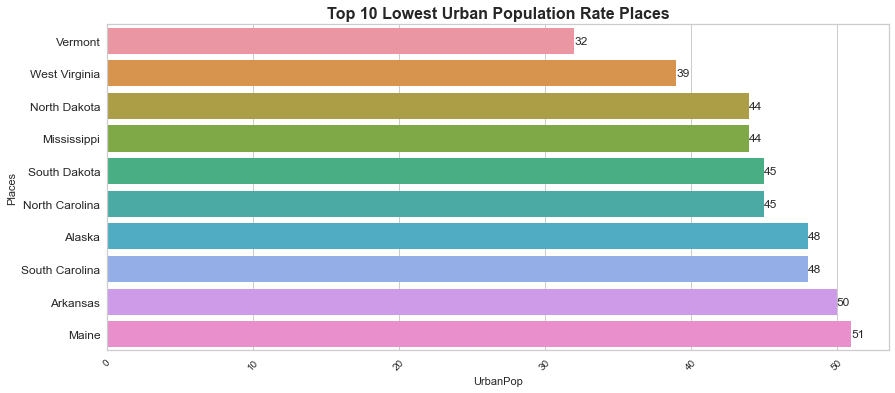

In [52]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = UrbanPop1.UrbanPop[:10], y = UrbanPop1.Places[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Top 10 Lowest Urban Population Rate Places',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

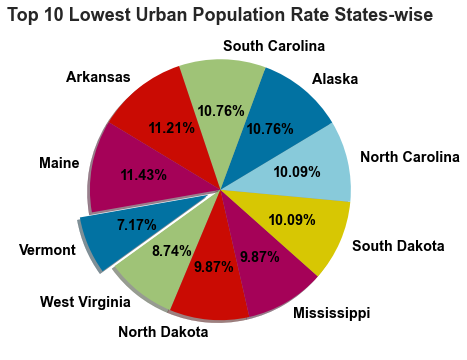

In [53]:
plt.figure(figsize = (6,6))
plt.pie(UrbanPop1.UrbanPop[:10], labels=UrbanPop1.Places[:10], explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large','fontweight':'bold', 'rotation':'0','color':'black'})

plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

## Standard Scaler

### Standardizing Data 

In [54]:
df = CrimeData.set_index('Places')
df.head()

,Murder,Assault,UrbanPop,Rape
Places,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [55]:
StandScale = StandardScaler()
std_df = StandScale.fit_transform(df)
std_df.shape

(50, 4)

### Normalizing Data 

In [56]:
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

# KMeans Clustering

### Elbow Method

In [57]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.738535
4,5,49.997133
5,6,44.772600
6,7,40.182445
7,8,35.663775
8,9,31.227614
9,10,29.056976


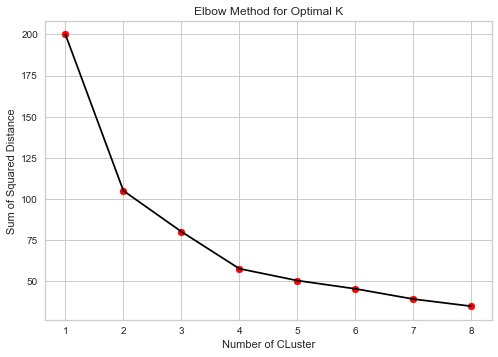

In [58]:
Sum_of_squared_distances = []
K = range(1,9)
for k in K:
    KM = KMeans(n_clusters = k)
    KM = KM.fit(std_df)
    Sum_of_squared_distances.append(KM.inertia_)

plt.plot(K , Sum_of_squared_distances, color = 'black')
plt.scatter(K ,Sum_of_squared_distances ,color='red')
plt.xlabel('Number of CLuster')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal K')
plt.show()

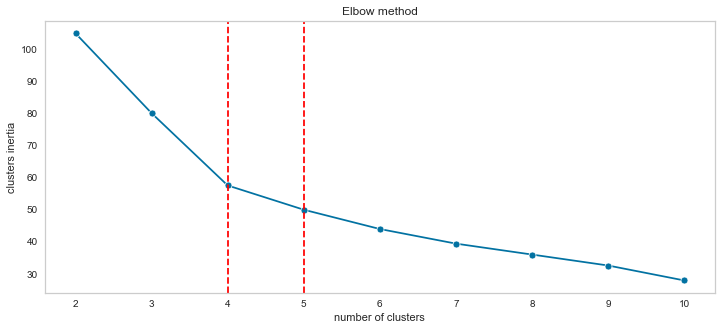

In [59]:

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

# Silhouette Coefficient 

In [60]:
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KMEST = KMeans(n_clusters = n, init = 'k-means++').fit(std_df)
    clusters_inertia.append(KMEST.inertia_)
    silhouette_avg = silhouette_score(std_df, KMEST.labels_)
    s_scores.append(silhouette_avg)

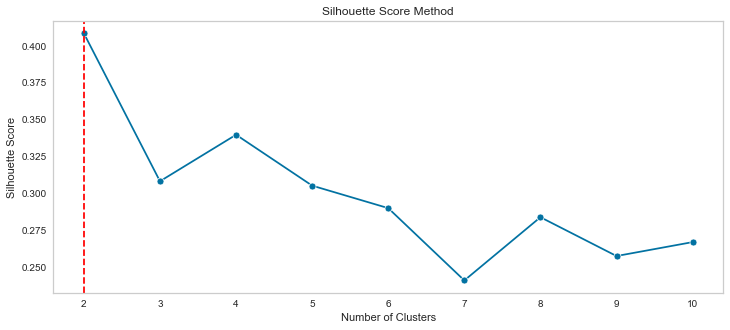

In [61]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(n_clusters, s_scores, marker = 'o', ax = ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(2, ls = "--", c = "red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


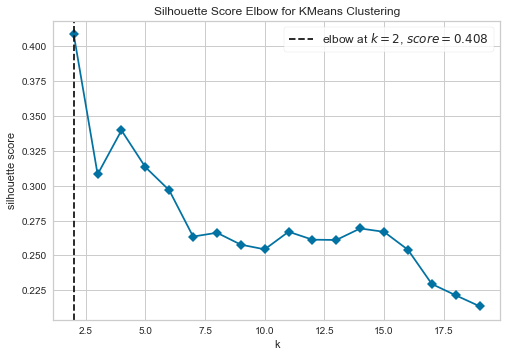

In [62]:
model = KMeans(random_state = 10, max_iter=500, init='k-means++')
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'silhouette', timings = False)

print('Elbow Plot for Standard Scaler data')

visualizer.fit(std_df)
visualizer.poof()
plt.show()

In [63]:
clust_list = [2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters = n_clusters, random_state = 0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    silhouette_score1 = silhouette_score(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters, "The Average Silhouette Score is :", silhouette_score1)

For n_clusters = 2 The Average Silhouette Score is : 0.4084890326217641
For n_clusters = 3 The Average Silhouette Score is : 0.3095091512791688
For n_clusters = 4 The Average Silhouette Score is : 0.33968891433344395
For n_clusters = 5 The Average Silhouette Score is : 0.30612803169146263
For n_clusters = 6 The Average Silhouette Score is : 0.29910456843899946
For n_clusters = 7 The Average Silhouette Score is : 0.23035904501364113
For n_clusters = 8 The Average Silhouette Score is : 0.2732934287338534
For n_clusters = 9 The Average Silhouette Score is : 0.2518939934580804


For n_clusters = 2  The Average Silhouette Score is : 0.4084890326217641
For n_clusters = 3  The Average Silhouette Score is : 0.3095091512791688
For n_clusters = 4  The Average Silhouette Score is : 0.33968891433344395
For n_clusters = 5  The Average Silhouette Score is : 0.30612803169146263
For n_clusters = 6  The Average Silhouette Score is : 0.29910456843899946
For n_clusters = 7  The Average Silhouette Score is : 0.23035904501364113
For n_clusters = 8  The Average Silhouette Score is : 0.2732934287338534
For n_clusters = 9  The Average Silhouette Score is : 0.2518939934580804


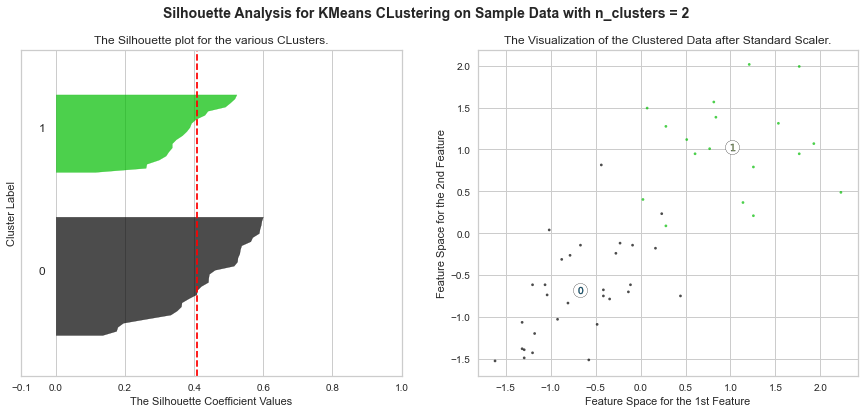

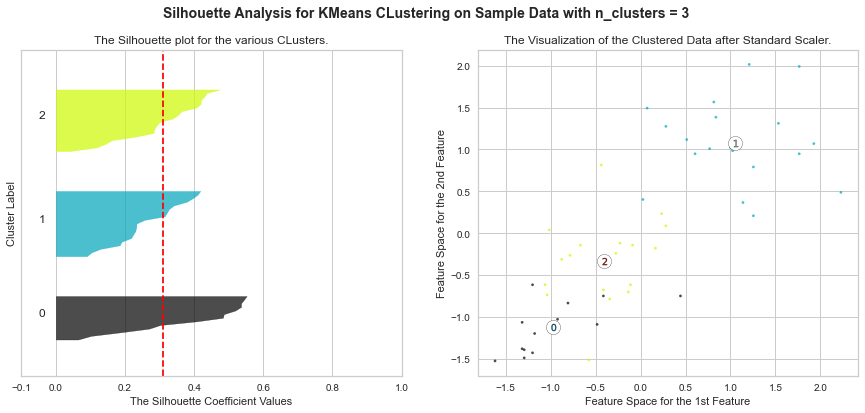

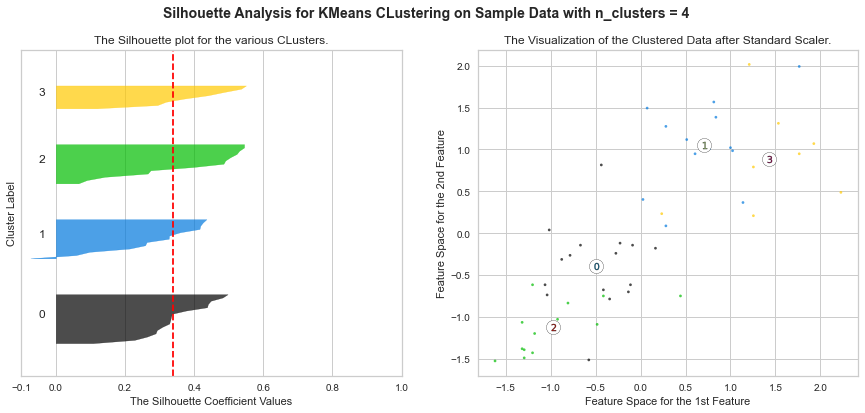

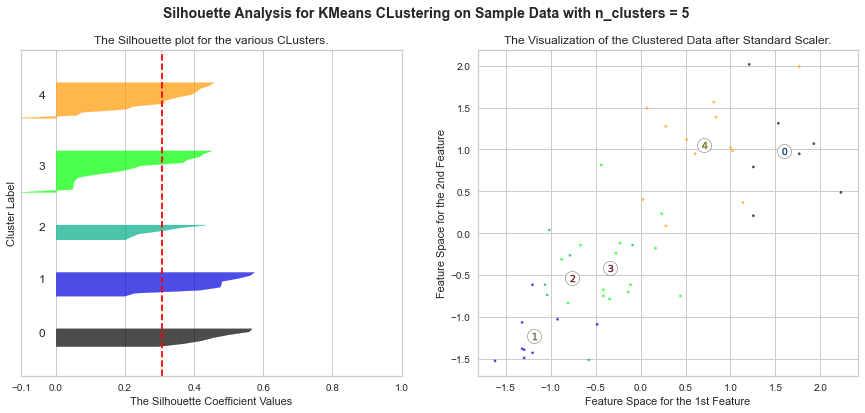

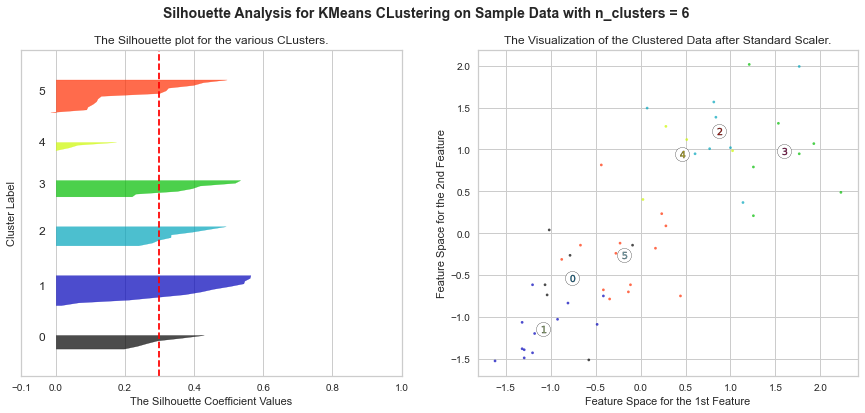

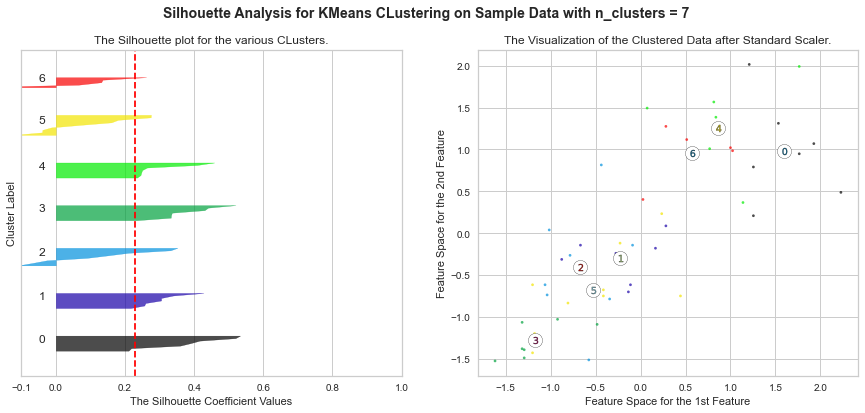

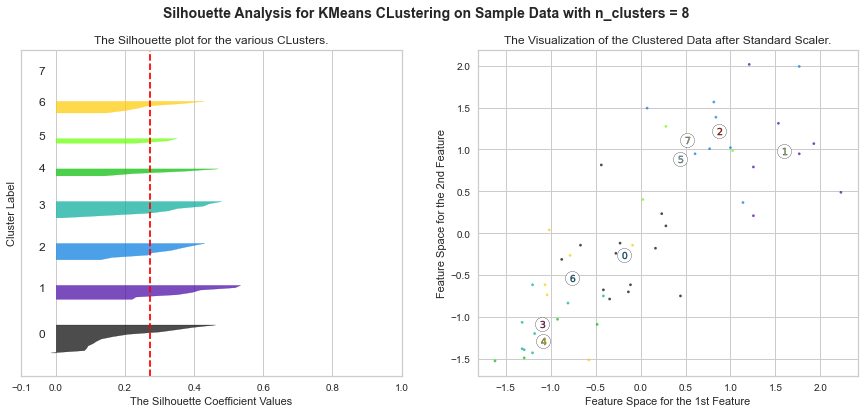

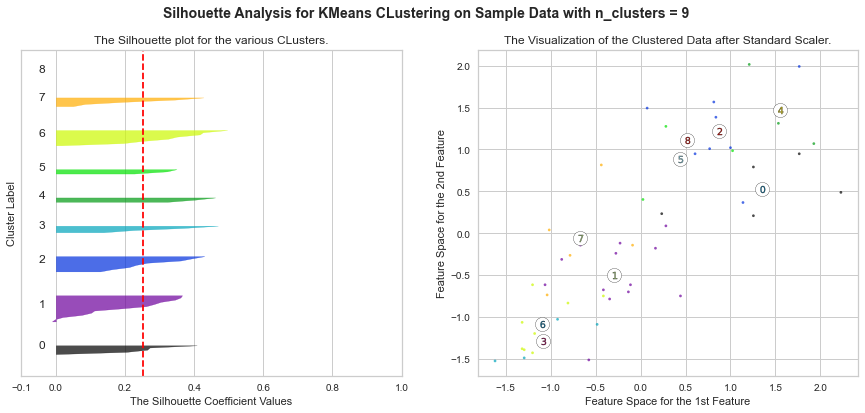

In [64]:
Range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in Range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15,6)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters = n_clusters, random_state = 0)
    cluster_labels = clusterer.fit_predict(std_df)
    
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    print("For n_clusters =", n_clusters, " The Average Silhouette Score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = CM.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                          facecolor = color, edgecolor = color, alpha = 0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The Silhouette plot for the various CLusters.")
    ax1.set_xlabel("The Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    colors = CM.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:,1], marker = '.', s = 30, lw = 0,alpha = 0.7, c = colors, edgecolors = 'k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:,0], centers[:,1], marker = 'o', c = "White", alpha = 1, s = 200, edgecolors = 'k')
    
    for i , c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolors = 'k')
        
    ax2.set_title("The Visualization of the Clustered Data after Standard Scaler.")
    ax2.set_xlabel("Feature Space for the 1st Feature")
    ax2.set_ylabel("Feature Space for the 2nd Feature")
    
    plt.suptitle(("Silhouette Analysis for KMeans CLustering on Sample Data with n_clusters = %d" % n_clusters),
                    fontsize = 14, fontweight = 'bold')
    
plt.show()

## Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset 

In [65]:
model_kmeans = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [66]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [67]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [68]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [69]:
model_kmeans.inertia_

80.0888613219962

In [70]:
df['KMeans_Label'] = model_kmeans.labels_

In [71]:
df.groupby('KMeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
KMeans_Label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


In [72]:
df[df['KMeans_Label']==0] 

,Murder,Assault,UrbanPop,Rape,KMeans_Label
Places,,,,,
Idaho,2.6,120,54,14.2,0
Iowa,2.2,56,57,11.3,0
Kentucky,9.7,109,52,16.3,0
Maine,2.1,83,51,7.8,0
Minnesota,2.7,72,66,14.9,0
Montana,6.0,109,53,16.4,0
Nebraska,4.3,102,62,16.5,0
New Hampshire,2.1,57,56,9.5,0
North Dakota,0.8,45,44,7.3,0


In [73]:
df[df['KMeans_Label']==1]

,Murder,Assault,UrbanPop,Rape,KMeans_Label
Places,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1


In [74]:
df[df['KMeans_Label']==2]

,Murder,Assault,UrbanPop,Rape,KMeans_Label
Places,,,,,
Arkansas,8.8,190,50,19.5,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
Missouri,9.0,178,70,28.2,2
New Jersey,7.4,159,89,18.8,2


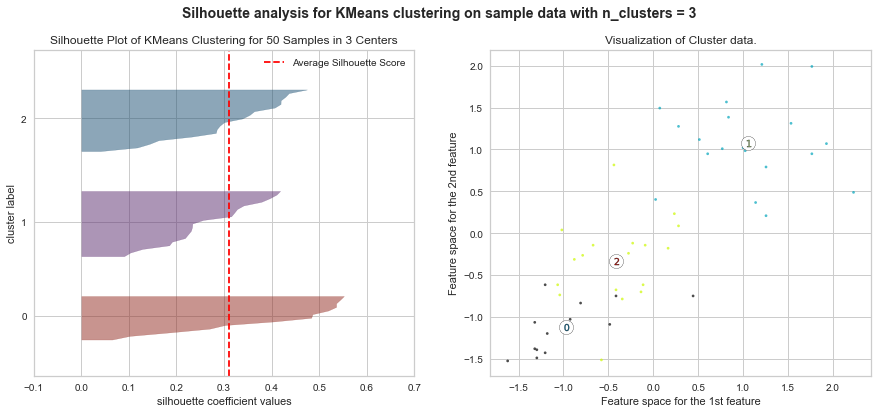

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = False)
fig.set_size_inches(15,6)

Sil_Visualizer1 = SilhouetteVisualizer(model_kmeans, ax = ax1, 
                                       colors = ['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
Sil_Visualizer1.fit(std_df)

# Showning the actual clusters formed

Color1 = CM.nipy_spectral(model_kmeans.labels_.astype(float) / 3)
ax2.scatter(std_df[:,0],std_df[:,1],marker='.', s=30, lw=0, alpha=0.7, c=Color1,edgecolor ='k')

#Labeling the CLusters
Center1 = model_kmeans.cluster_centers_

ax2.scatter(Center1[:,0], Center1[:,1],marker='o',c="White",alpha=1, s=200,edgecolors='k')

for i, c in enumerate(Center1):
    ax2.scatter(c[0], c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor ='k')
    
ax2.set_title(label="Visualization of Cluster data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

Sil_Visualizer1.show()
plt.show()


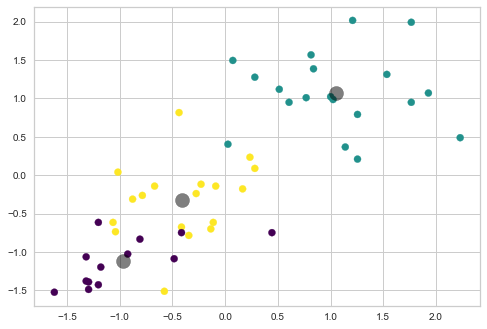

In [76]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

## Elbow Method and Silhouette Score on MinMaxScaler Applied Data 

In [77]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.010878
3,4,3.683456
4,5,3.214672
5,6,2.915978
6,7,2.587766
7,8,2.399525
8,9,2.194719
9,10,1.974343


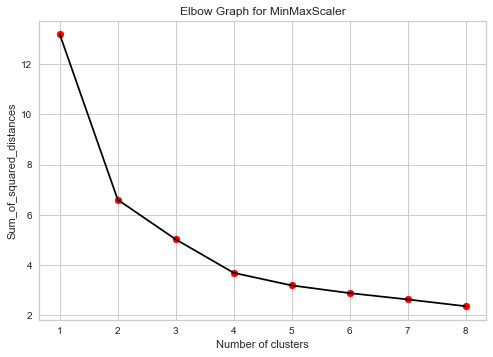

In [78]:
Sum_of_squared_distances=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
# Plot K values range vs Sum_of_squared_distances to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),Sum_of_squared_distances,color = 'black')
plt.scatter(range(1,9),Sum_of_squared_distances,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

Elbow Plot for MinMaxScaler data


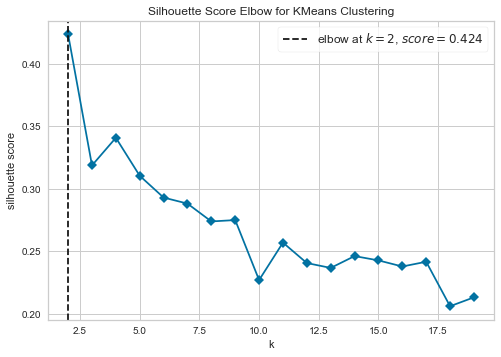

In [79]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [80]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    silhouette_score1= silhouette_score(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.3062742525752849
For n_clusters = 6 The average silhouette_score is : 0.27035587392051724
For n_clusters = 7 The average silhouette_score is : 0.2371119747926814
For n_clusters = 8 The average silhouette_score is : 0.24422345369104229
For n_clusters = 9 The average silhouette_score is : 0.23181794623773663


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074


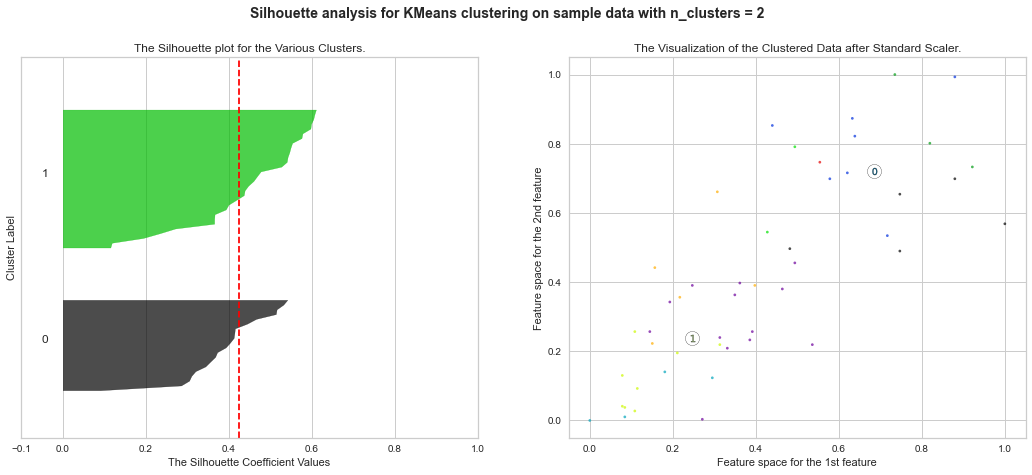

For n_clusters = 3 The average silhouette_score is : 0.3187755079997931


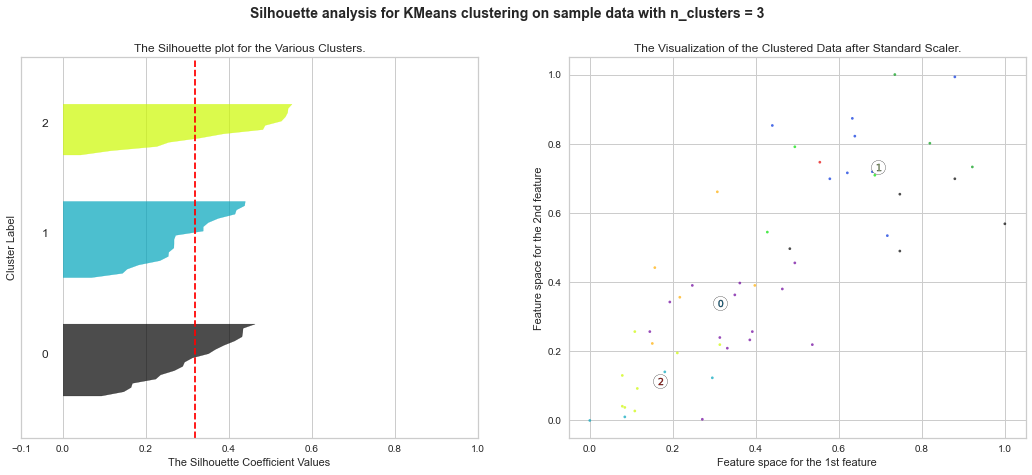

For n_clusters = 4 The average silhouette_score is : 0.34089035600743633


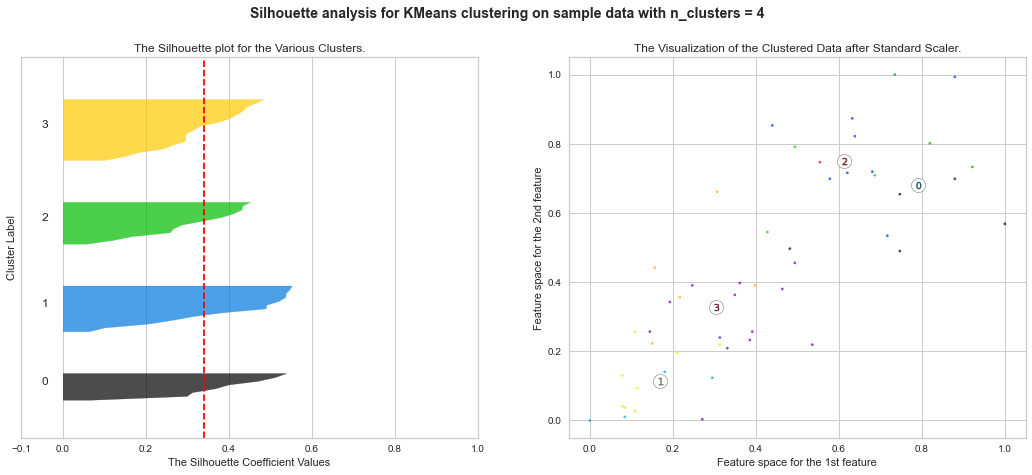

For n_clusters = 5 The average silhouette_score is : 0.31047828422452595


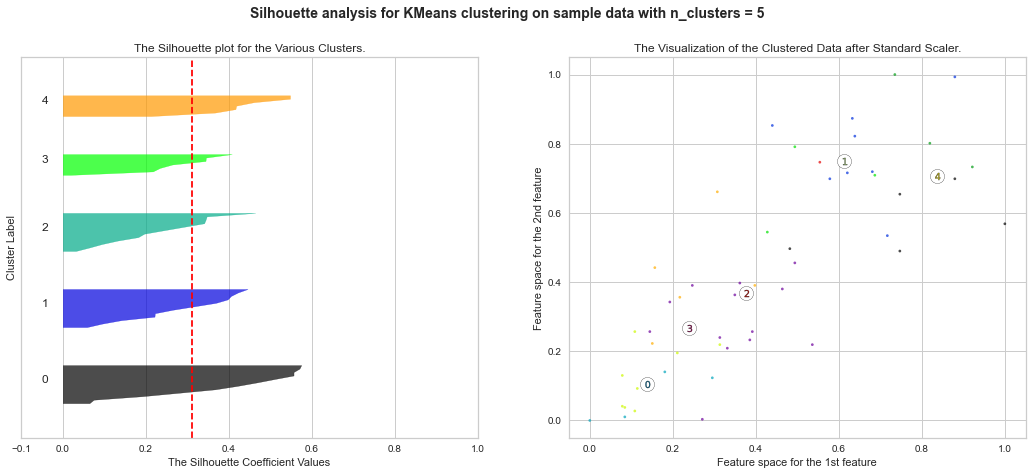

For n_clusters = 6 The average silhouette_score is : 0.29304639988963094


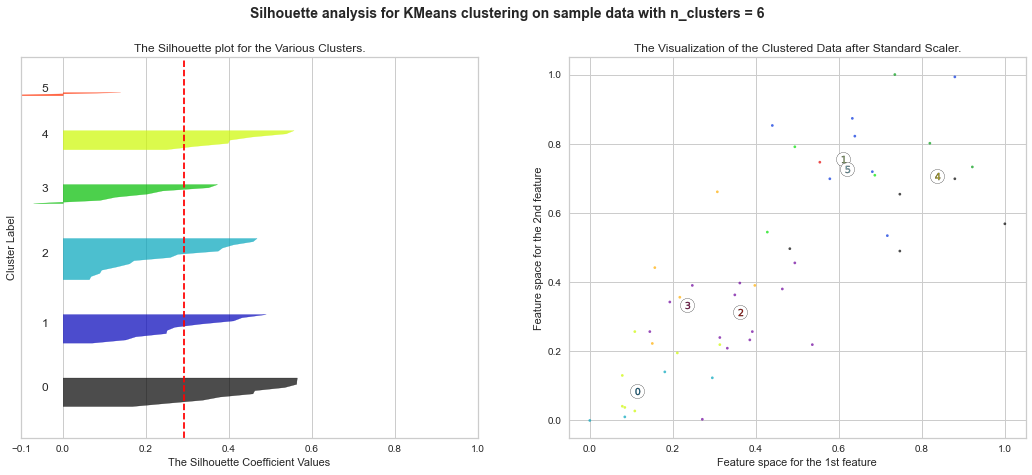

For n_clusters = 7 The average silhouette_score is : 0.28821826266004197


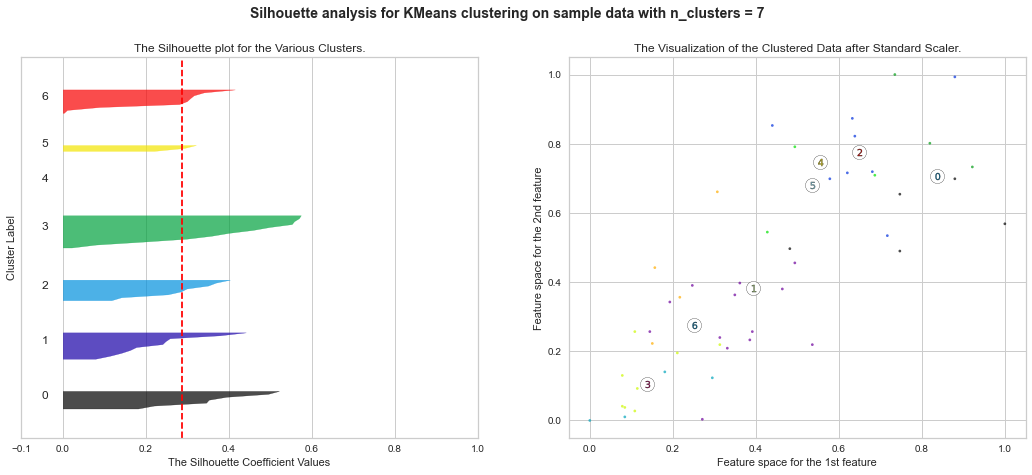

For n_clusters = 8 The average silhouette_score is : 0.2739250289741455


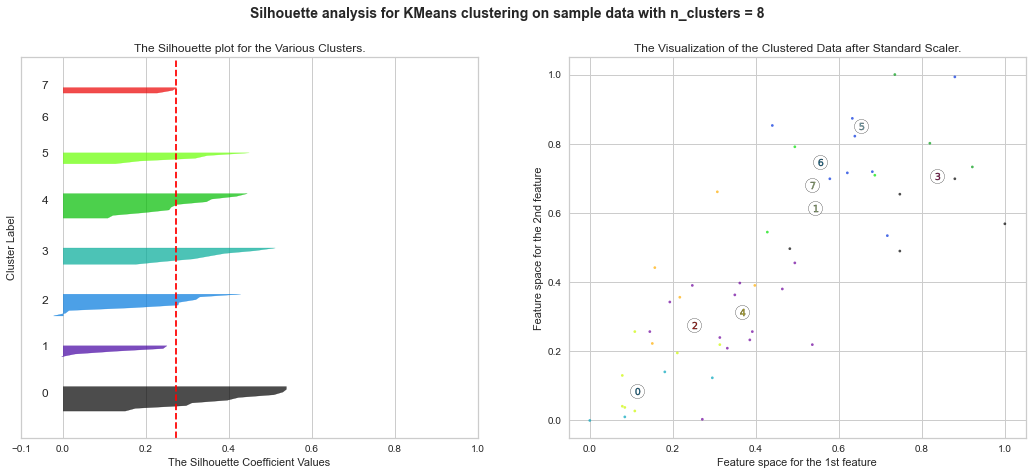

For n_clusters = 9 The average silhouette_score is : 0.27503190107418357


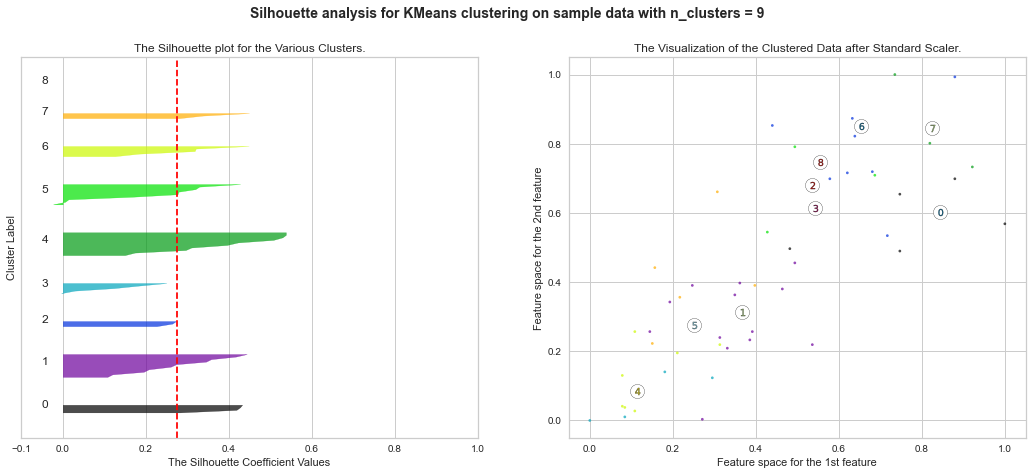

In [81]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters = n_clusters, random_state =10)
    cluster_labels = clusterer.fit_predict(minmax_df)
    
    silhouette_avg = silhouette_score(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = CM.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The Silhouette plot for the Various Clusters.")
    ax1.set_xlabel("The Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Plot showing the actual clusters formed
    color = CM.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,0], minmax_df[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The Visualization of the Clustered Data after Standard Scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset 

In [82]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [83]:
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [84]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [85]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [86]:
model_kmeans.inertia_

6.596893867946196

In [87]:
#Assign clusters to the data set
df['KMeans_Label'] = model_kmeans.labels_

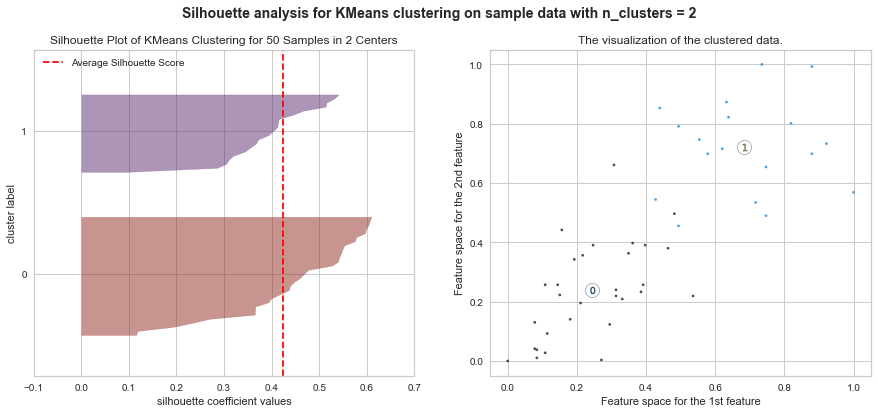

In [88]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)

colors1 = CM.nipy_spectral(model_kmeans.labels_.astype(float) / 4) 
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

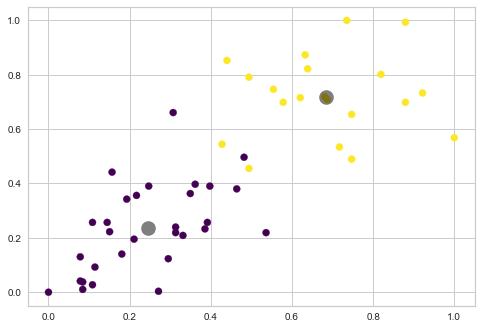

In [89]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [90]:
# Group data by Clusters 
df.groupby('KMeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
KMeans_Label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


# Hierarchical Clustering Algorithm
### Dendogram on MinMaxScaler Applied on Dataset

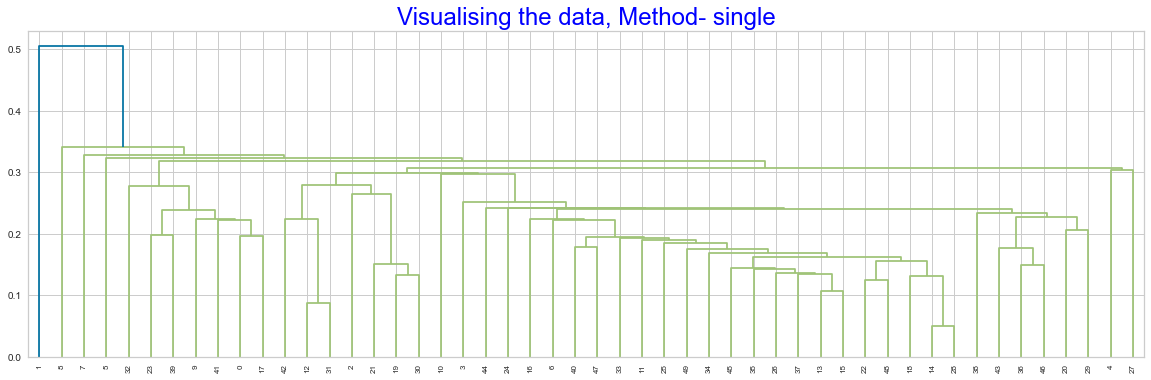

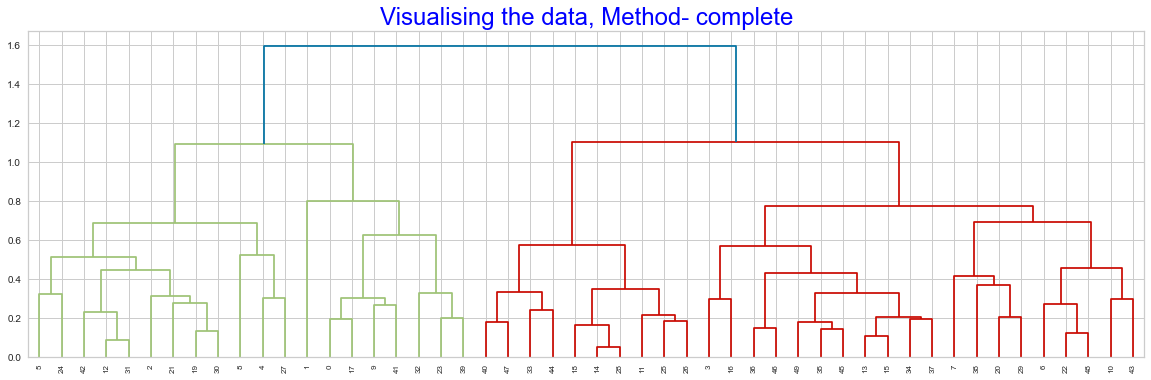

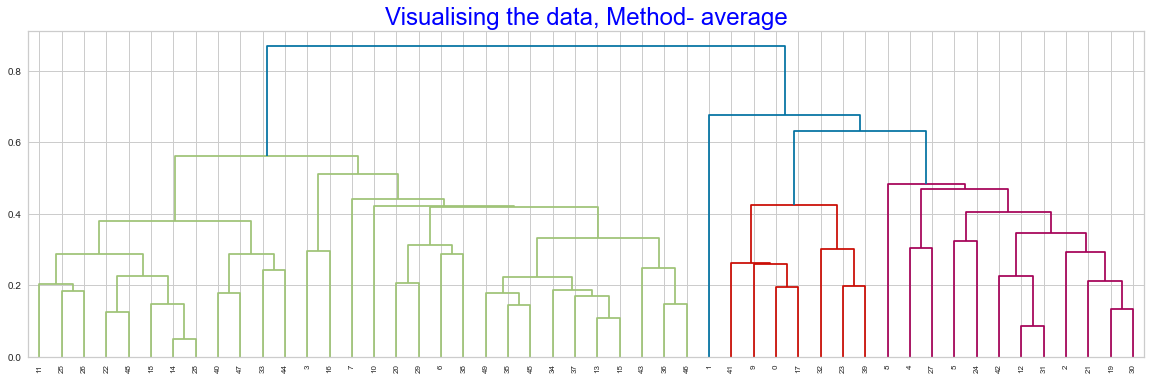

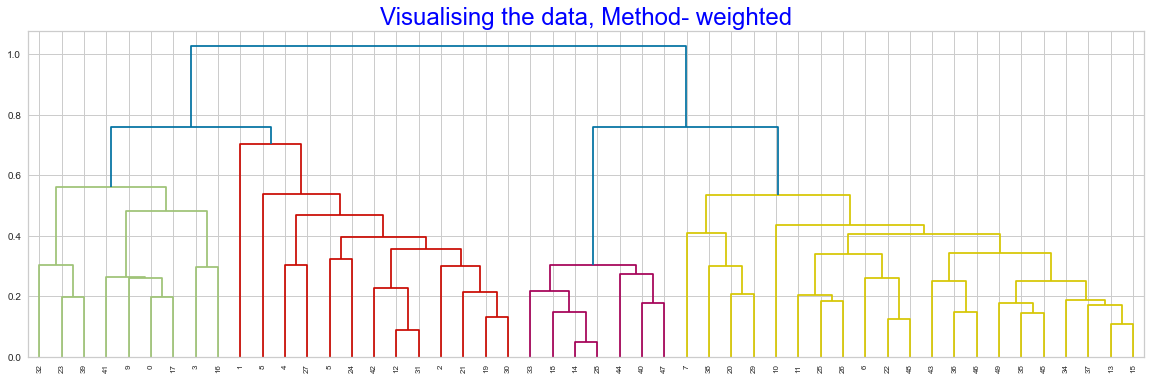

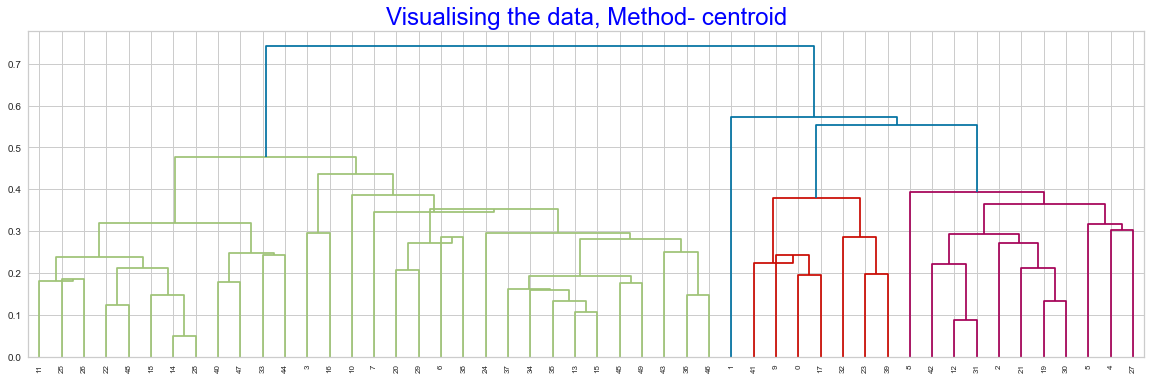

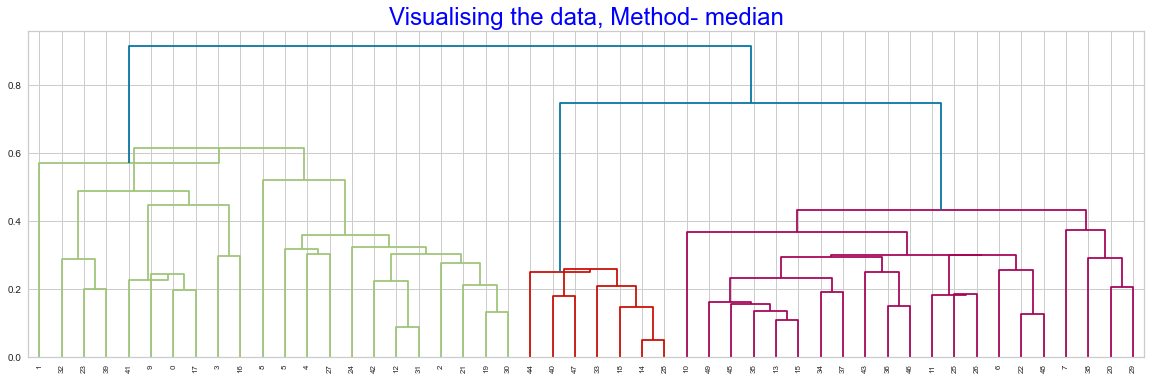

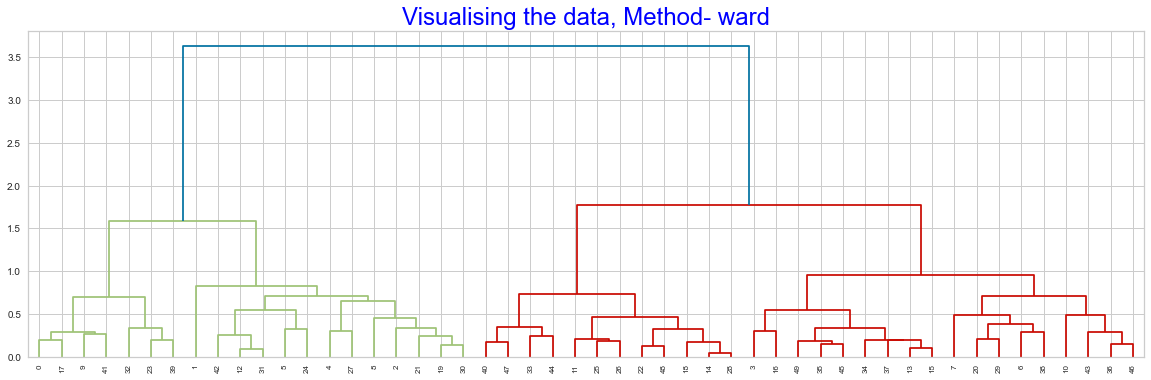

In [91]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [92]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = silhouette_score(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

### Dendrogram on Standard Scaler Applied on Data 

In [93]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = silhouette_score(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

### Run Hierarchical Clustering.(Agglomerative Clustering)

In [94]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [95]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [96]:
# Clustering Score

(silhouette_score(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

### Putting Cluster lables into original dataset And analysis of the same 

In [97]:
# Concating Labels with main dataset copy

df['Hierarchical_Labels'] = agg_clustering.labels_

In [98]:
df.groupby('Hierarchical_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,KMeans_Label
,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


<AxesSubplot:xlabel='Hierarchical_Labels', ylabel='Murder'>

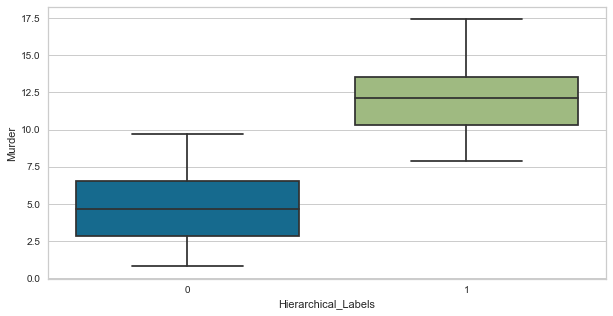

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Murder', data=df)

<AxesSubplot:xlabel='Hierarchical_Labels', ylabel='Assault'>

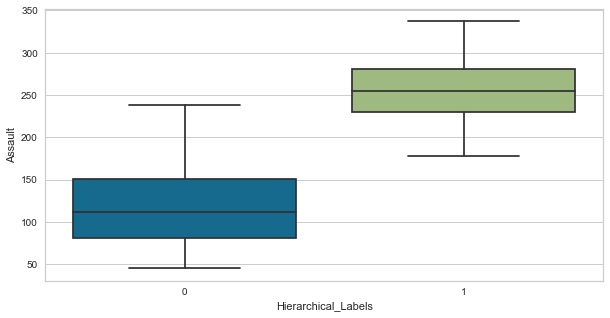

In [100]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Assault', data=df)

<AxesSubplot:xlabel='Hierarchical_Labels', ylabel='Rape'>

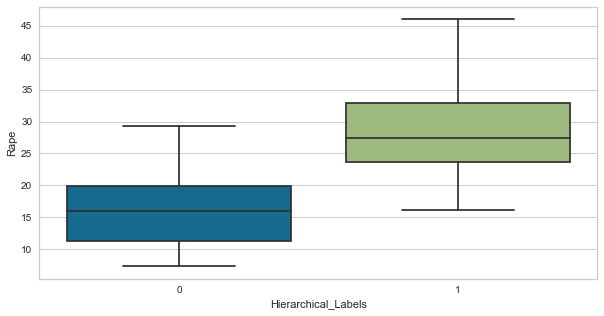

In [101]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Rape', data=df)

# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)
### DBSCAN of Standard Scaled Data

In [102]:
Eps_Values = np.arange(0.25,2,0.25)
min_samples = np.arange(1,3)
DBSCAN_params = list(product(Eps_Values,min_samples))

In [103]:
No_of_Clusters = []
Sil_Score = []

for p in DBSCAN_params:
    DBS_Clustering = DBSCAN(eps = p[0], min_samples = p[1]).fit(std_df)
    No_of_Clusters.append(len(np.unique(DBS_Clustering.labels_)))
    Sil_Score.append(silhouette_score(std_df, DBS_Clustering.labels_))

A Heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


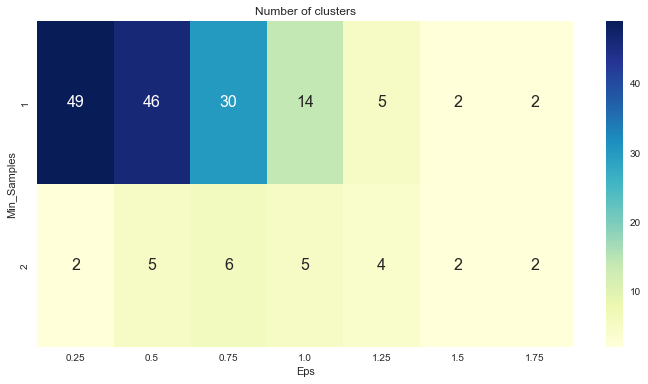

In [104]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns = ['Eps','Min_Samples'])
TMP['No of Clusters'] = No_of_Clusters

Pivot_1 = pd.pivot_table(TMP, values = 'No of Clusters', index = 'Min_Samples', columns = 'Eps')

fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(Pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A Heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

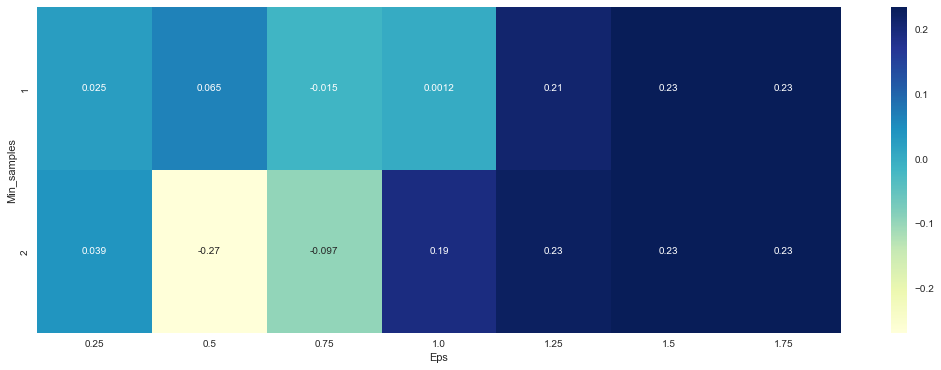

In [105]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
TMP['Sil_score'] = Sil_Score

Pivot_1 = pd.pivot_table(TMP, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(Pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [106]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


Sil_Avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps = epsilon[i]).fit(std_df)
     
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        Sil_Avg.append(silhouette_avg)

print("Epsilon=", max_value[0], "\nMin_sample=", max_value[1],"\nNumber of clusters=", max_value[2],
      "\nAverage silhouette score= %.4f" % max_value[3])

Epsilon= 1.5 
Min_sample= 1 
Number of clusters= 2 
Average silhouette score= 0.2346


#### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values 

In [107]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [108]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
df['DBSCAN_Labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,KMeans_Label,Hierarchical_Labels,DBSCAN_Labels
Places,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [110]:
df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,KMeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


### Silhouette Score for DBSCAN 

In [111]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


## DBSCAN on MinMax Scaled Data 

In [112]:
from itertools import product

Eps_Values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(Eps_Values, min_samples))

In [113]:
No_of_Clusters = []
Sil_Score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps = p[0], min_samples=p[1]).fit(minmax_df)
    No_of_Clusters.append(len(np.unique(DBS_clustering.labels_)))
    Sil_Score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

A Heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


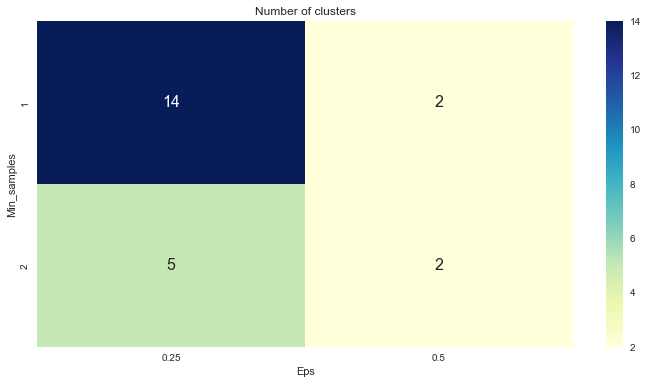

In [114]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
TMP['No_of_clusters'] = No_of_Clusters

Pivot_1 = pd.pivot_table(TMP, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A Heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

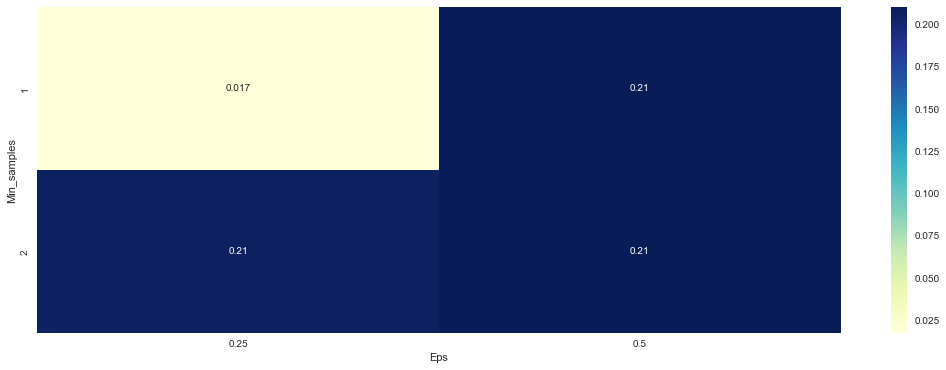

In [115]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
TMP['Sil_score'] = Sil_Score

Pivot_1 = pd.pivot_table(TMP, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(Pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [116]:
Epsilon = [0.25,0.5]
min_samples = [1,2]


Sil_Avg = []
max_value = [0,0,0,0]

for i in range(len(Epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps = Epsilon[i]).fit(minmax_df)
    
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value = (Epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        Sil_Avg.append(silhouette_avg)

print("Epsilon=", max_value[0], "\nmin_sample=", max_value[1],"\nNumber of clusters=", max_value[2],
      "\nAverage silhouette score= %.4f" % max_value[3])

Epsilon= 0.5 
min_sample= 1 
Number of clusters= 2 
Average silhouette score= 0.2103


#### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values 

In [117]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [118]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [119]:
df['DBSCAN_Labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,KMeans_Label,Hierarchical_Labels,DBSCAN_Labels
Places,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [120]:
df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,KMeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [121]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_avg'])

In [122]:
Avg_df = pd.concat([cluster1,cluster2],axis=1)
Avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
KMeans_Label,0.387755,1.0
Hierarchical_Labels,0.387755,1.0
DBSCAN_Labels,0.000000,1.0


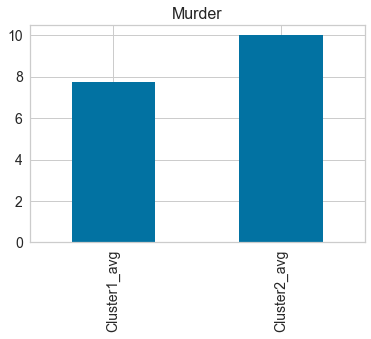

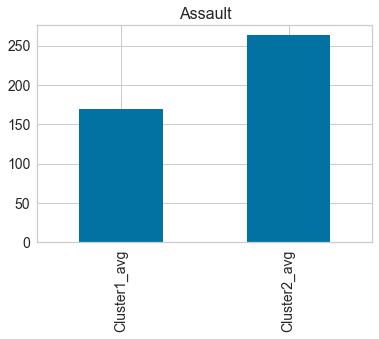

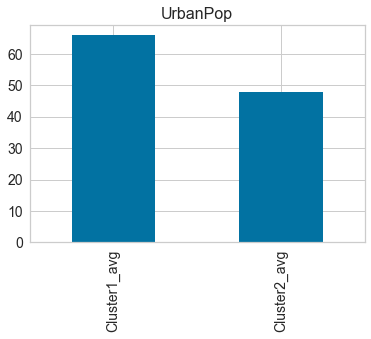

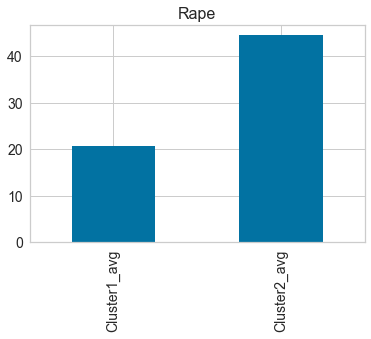

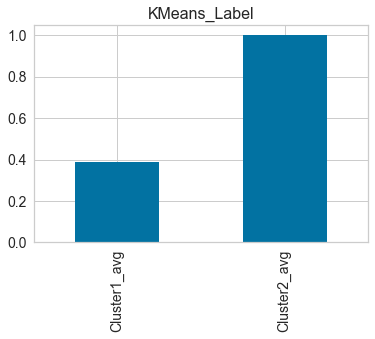

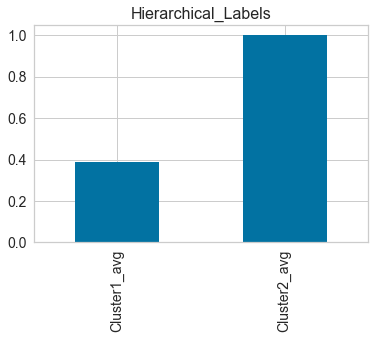

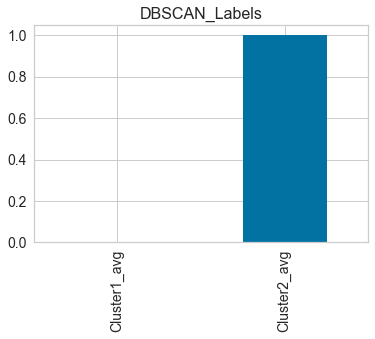

In [123]:
# Extract and plot one Column data .xs method
for i , row in Avg_df.iterrows():
    fig = plt.subplots(figsize=(6,4))
    j = Avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()